In [1]:
import json

In [2]:
from rdkit.ML.Scoring.Scoring import CalcBEDROC, CalcEnrichment, CalcAUC

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [5]:
t = pd.read_csv('results/scaffold_split_0_new_platinum')

In [6]:
t.head()

,Unnamed: 0,all_targets,all_preds,all_losses,mean_loss,all_bioactive_rank,median_bioactive_rank,bioactive_accuracy,n_bioactive,n_generated,generated_accuracy,ccdc_accuracy,n_heavy_atoms,n_rotatable_bonds,ef20_pred,ef20_ccdc
0,COc1ccc(-c2cn(C)c(=O)c3cc(C(=O)NC4CCS(=O)(=O)C...,"[0.0, 0.0, 0.0, 1.5365843, 1.2933521, 1.101103...","[0.37148726, 0.9099539, 0.37084562, 0.8539606,...","[0.13800278306007385, 0.8280161023139954, 0.13...",0.385653,[ 5 62 4],5.0,0.0,3.0,100.0,False,False,32.0,5.0,1.0,3.0
1,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3cc(C(C)(C)C)nn3-c3...,"[0.0, 0.0, 0.0, 0.0, 1.831411, 1.6918179, 1.87...","[1.783191, 1.6663668, 1.9800689, 1.7840353, 1....","[3.179769992828369, 2.77677845954895, 3.920672...",0.469517,[72 45 87 73],72.5,0.0,4.0,100.0,False,False,41.0,6.0,0.0,2.0
2,NC(=O)c1cc2c(N)ncc(C(N)=O)c2s1,"[0.0, 0.0, 0.17724587, 0.80433184, 0.7780529, ...","[0.047909733, 0.048393857, 0.078016, 0.3489362...","[0.002295342506840825, 0.0023419654462486506, ...",0.128034,[0 1],0.5,1.0,2.0,8.0,True,True,16.0,2.0,NaN,NaN
3,NS(=O)(=O)c1ccc(Nc2cc(OC3CCCCC3)nc3ncnn23)cc1,"[0.0, 0.0, 1.6798079, 1.7089509, 1.7834351, 1....","[1.2860682, 1.2857269, 1.2390808, 1.2633324, 1...","[1.6539714336395264, 1.653093695640564, 0.1942...",0.250455,[52 50],51.0,0.0,2.0,100.0,False,False,27.0,5.0,0.0,0.0
4,Cc1nn(-c2ccnc(Nc3ccc4c(cnn4C)c3)n2)cc1C[NH+]1C...,"[0.0, 0.0, 1.1307844, 1.063074, 2.6535778, 2.9...","[1.156911, 1.1569222, 1.207288, 1.5457984, 2.8...","[1.3384430408477783, 1.3384690284729004, 0.005...",0.118089,[7 8],7.5,0.0,2.0,100.0,False,False,29.0,5.0,3.5,0.5


In [156]:
mol_i = 4
targets = json.loads(t.iloc[mol_i, 1])
preds = json.loads(t.iloc[mol_i, 2])

In [183]:
all_targets = []
all_preds = []
bedrocs_model = []
bedrocs_ccdc = []
for mol_i in tqdm(range(len(t) - 1)) :
    
    targets = json.loads(t.iloc[mol_i, 1])
    preds = json.loads(t.iloc[mol_i, 2])
    all_targets.extend(targets)
    all_preds.extend(preds)
    
    actives_i = np.argsort(targets)[:int(len(targets) / 10)]
    activity = [True if i in actives_i else False for i in range(len(preds)) ]
    preds_array = np.array(list(zip(preds, activity)))
    sorting = np.argsort(preds_array[:, 0])
    sorted_preds_array = preds_array[sorting]
    
    bedrocs_model.append(CalcBEDROC(sorted_preds_array, col=1, alpha=20))
    
    bedrocs_ccdc.append(CalcBEDROC(preds_array, col=1, alpha=20))

100%|█████████████████████████████████████| 1110/1110 [00:00<00:00, 3877.35it/s]


In [184]:
actives_i = np.argsort(all_targets)[:int(len(all_targets) / 10)]
activity = [True if i in actives_i else False for i in range(len(all_preds)) ]

<AxesSubplot:ylabel='Count'>

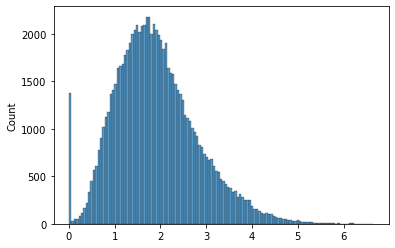

In [185]:
sns.histplot(all_targets)

In [186]:
all_targets[57328]

0.8593591

In [187]:
preds_array = np.array(list(zip(all_preds, activity)))
sorting = np.argsort(preds_array[:, 0])
sorted_preds_array = preds_array[sorting]

In [230]:
np.random.shuffle(sorted_preds_array)

In [287]:
CalcEnrichment(sorted_preds_array, col=1, fractions=[0.1])

[3.0]

In [288]:
CalcEnrichment(preds_array, col=1, fractions=[0.1])

[1.0]

In [188]:
CalcBEDROC(sorted_preds_array, col=1, alpha=20)

0.4707700546619707

In [189]:
CalcBEDROC(preds_array, col=1, alpha=20)

0.13163461318110437

<AxesSubplot:ylabel='Count'>

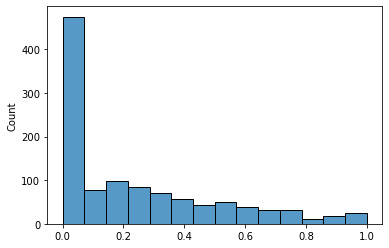

In [190]:
sns.histplot(bedrocs_model)

<AxesSubplot:ylabel='Count'>

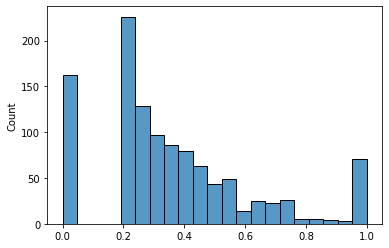

In [191]:
sns.histplot(bedrocs_ccdc)

In [227]:
np.median(bedrocs_model)

0.06492394354379416

In [228]:
np.median(bedrocs_ccdc)

0.07373759860795658

In [7]:
all_targets = []
all_preds = []
bedrocs_model = []
bedrocs_ccdc = []
n_rotatable_bonds = []
for mol_i in tqdm(range(len(t) - 1)) :
    
    targets = json.loads(t.iloc[mol_i, 1])
    targets = np.array(targets)
    generated = targets != 0
    generated_targets = targets[generated]
    if len(generated_targets) : 
        preds = json.loads(t.iloc[mol_i, 2])
        preds = np.array(preds)
        generated_preds = preds[generated]
        all_targets.extend(generated_targets)
        all_preds.extend(generated_preds)

        actives_i = np.argsort(generated_targets)[:int(len(generated_targets) / 10)]
        activity = [True if i in actives_i else False for i in range(len(generated_preds)) ]
        preds_array = np.array(list(zip(preds, activity)))
        sorting = np.argsort(preds_array[:, 0])
        sorted_preds_array = preds_array[sorting]

        bedrocs_model.append(CalcBEDROC(sorted_preds_array, col=1, alpha=20))

        bedrocs_ccdc.append(CalcBEDROC(preds_array, col=1, alpha=20))
        
        n_rotatable_bonds.append(int(t.loc[mol_i, 'n_rotatable_bonds']))

100%|█████████████████████████████████████| 4548/4548 [00:01<00:00, 3629.65it/s]


In [8]:
actives_i = np.argsort(all_targets)[:int(len(all_targets) / 10)]
activity = [True if i in actives_i else False for i in range(len(all_preds)) ]

In [9]:
np.array(all_targets)[activity]

array([0.2511729 , 0.22680886, 0.71707267, ..., 0.62015975, 0.32397273,
       0.54607266])

<AxesSubplot:ylabel='Count'>

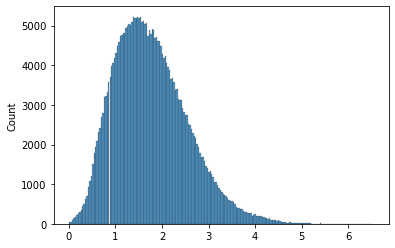

In [10]:
sns.histplot(all_targets)

In [12]:
preds_array = np.array(list(zip(all_preds, activity)))
sorting = np.argsort(preds_array[:, 0])
sorted_preds_array = preds_array[sorting]

<AxesSubplot:ylabel='Count'>

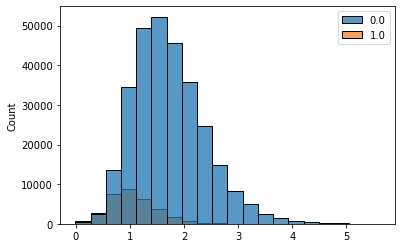

In [13]:
sns.histplot(x=preds_array[:,0], hue=preds_array[:,1], bins=20)

In [14]:
CalcEnrichment(sorted_preds_array, col=1, fractions=[0.2])

[2.9138817876613174]

In [15]:
CalcEnrichment(preds_array, col=1, fractions=[0.2])

[1.278528967875073]

In [26]:
CalcBEDROC(sorted_preds_array, col=1, alpha=20)

0.4629806789257138

In [17]:
CalcBEDROC(preds_array, col=1, alpha=20)

0.15442080211263687

<AxesSubplot:ylabel='Count'>

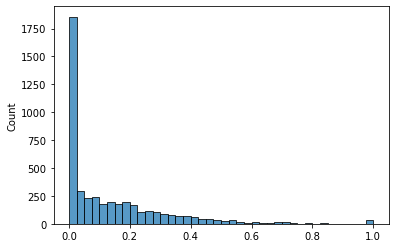

In [18]:
sns.histplot(bedrocs_model)

<AxesSubplot:ylabel='Count'>

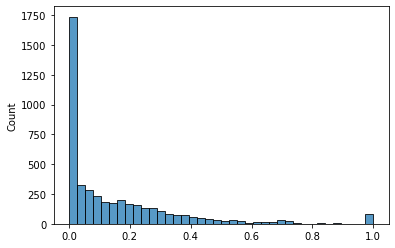

In [19]:
sns.histplot(bedrocs_ccdc)

In [20]:
np.mean(bedrocs_model)

0.13342371428996527

In [21]:
np.mean(bedrocs_ccdc)

0.1513573172965136

In [22]:
np.median(bedrocs_model)

0.06275259559659495

In [23]:
np.median(bedrocs_ccdc)

0.07005740670894449

<AxesSubplot:>

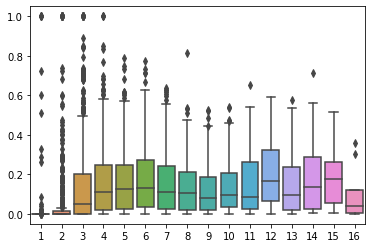

In [24]:
sns.boxplot(x=n_rotatable_bonds, y=bedrocs_model)

<AxesSubplot:>

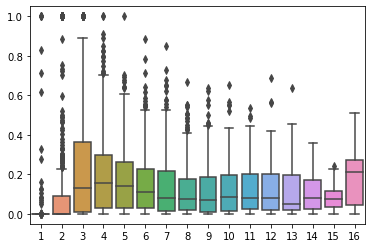

In [25]:
sns.boxplot(x=n_rotatable_bonds, y=bedrocs_ccdc)

In [157]:
actives_i = np.argsort(targets)[:int(len(targets) / 10)]
activity = [True if i in actives_i else False for i in range(len(preds)) ]

In [158]:
preds_array = np.array(list(zip(preds, activity)))
sorting = np.argsort(preds_array[:, 0])
sorted_preds_array = preds_array[sorting]

In [159]:
CalcBEDROC(sorted_preds_array, col=1, alpha=20)

0.09508871682533876

In [160]:
CalcBEDROC(preds_array, col=1, alpha=20)

0.4658123067045892

In [36]:
t_nomicro = t.dropna(subset=['n_heavy_atoms']).copy()
t_nomicro['n_heavy_atoms'] = t_nomicro['n_heavy_atoms'].astype(int)
t_nomicro['n_rotatable_bonds'] = t_nomicro['n_rotatable_bonds'].astype(int)

<AxesSubplot:xlabel='n_heavy_atoms', ylabel='n_rotatable_bonds'>

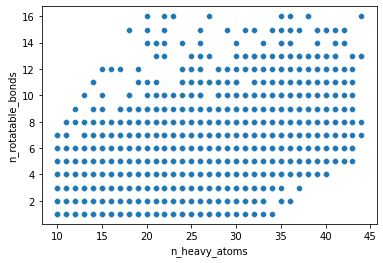

In [37]:
#plt.figure(figsize=(10,5))
sns.scatterplot(data=t_nomicro, x='n_heavy_atoms', y='n_rotatable_bonds')

<AxesSubplot:xlabel='n_heavy_atoms', ylabel='mean_loss'>

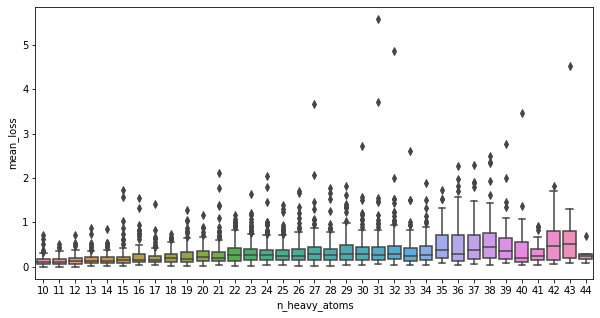

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=t_nomicro, x='n_heavy_atoms', y='mean_loss')

<AxesSubplot:xlabel='n_rotatable_bonds', ylabel='mean_loss'>

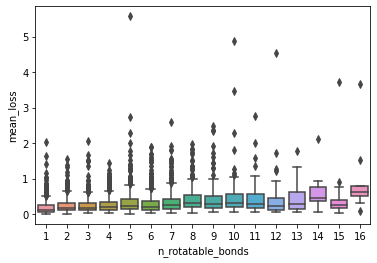

In [22]:
sns.boxplot(data=t_nomicro, x='n_rotatable_bonds', y='mean_loss')

<AxesSubplot:xlabel='n_heavy_atoms', ylabel='n_bioactive'>

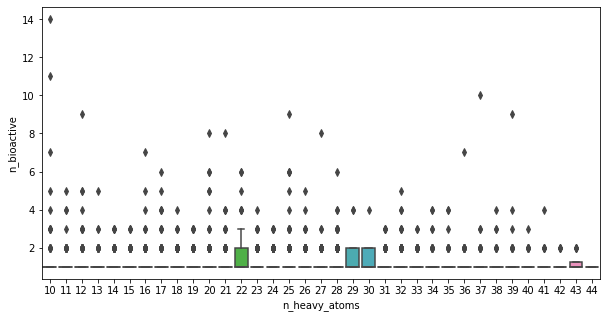

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(data=t_nomicro, x='n_heavy_atoms', y='n_bioactive')

<AxesSubplot:xlabel='n_generated', ylabel='Count'>

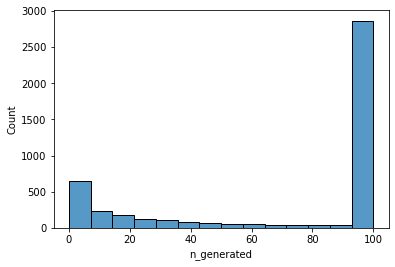

In [46]:
sns.histplot(data=t_nomicro, x='n_generated')

<AxesSubplot:xlabel='n_heavy_atoms', ylabel='n_generated'>

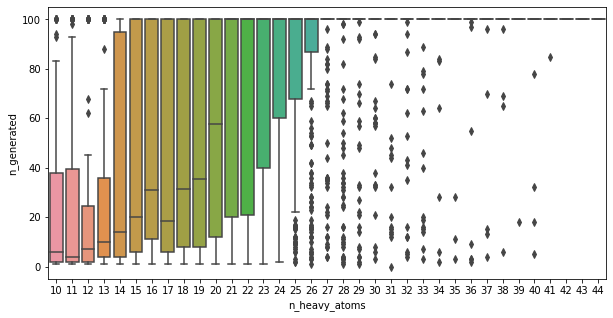

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(data=t_nomicro, x='n_heavy_atoms', y='n_generated')

<AxesSubplot:xlabel='n_generated', ylabel='mean_loss'>

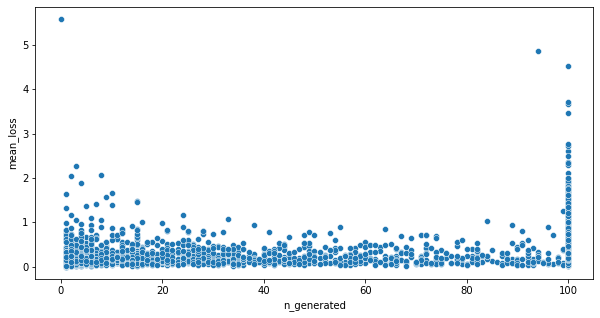

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=t_nomicro, x='n_generated', y='mean_loss')

<AxesSubplot:xlabel='n_bioactive', ylabel='bioactive_accuracy'>

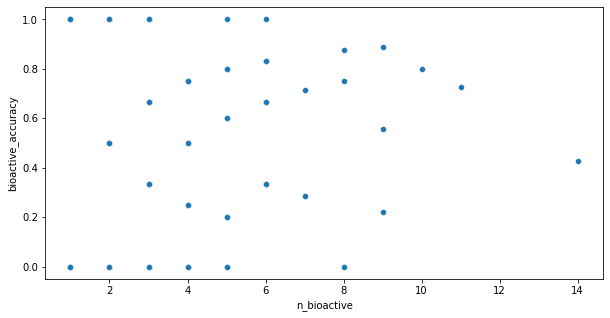

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=t_nomicro, x='n_bioactive', y='bioactive_accuracy')

<AxesSubplot:xlabel='n_bioactive', ylabel='median_bioactive_rank'>

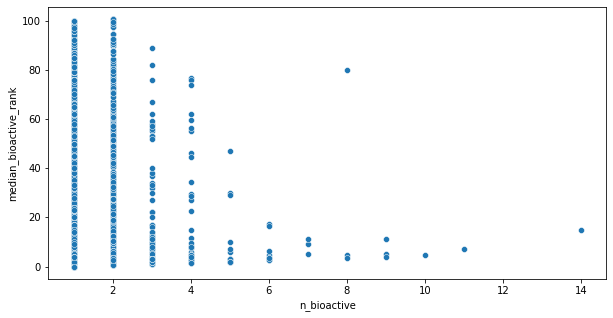

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=t_nomicro, x='n_bioactive', y='median_bioactive_rank')

<AxesSubplot:xlabel='n_heavy_atoms', ylabel='median_bioactive_rank'>

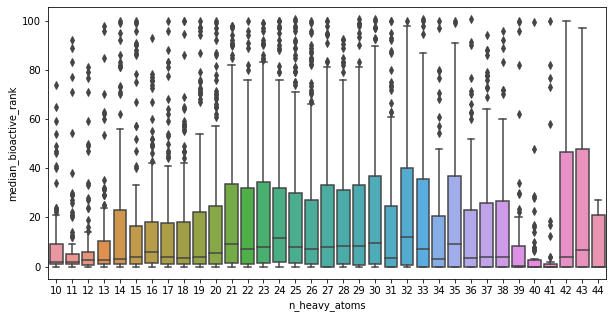

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=t_nomicro, x='n_heavy_atoms', y='median_bioactive_rank')

<AxesSubplot:xlabel='n_rotatable_bonds', ylabel='median_bioactive_rank'>

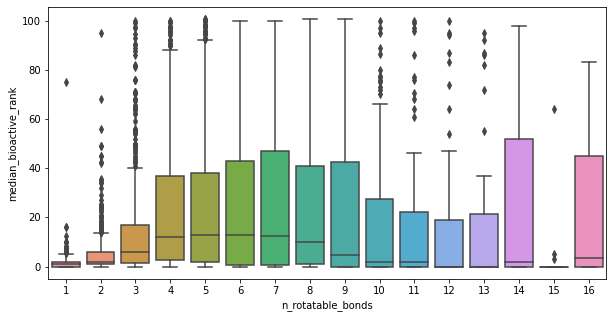

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(data=t_nomicro, x='n_rotatable_bonds', y='median_bioactive_rank')

<AxesSubplot:xlabel='n_rotatable_bonds', ylabel='ef20_ccdc'>

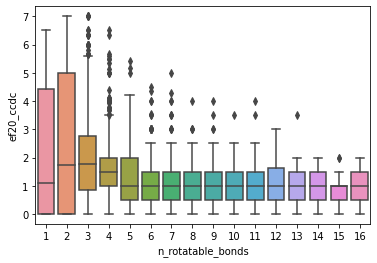

In [50]:
sns.boxplot(data=t_nomicro, x='n_rotatable_bonds', y='ef20_ccdc')

<AxesSubplot:xlabel='n_rotatable_bonds', ylabel='ef20_pred'>

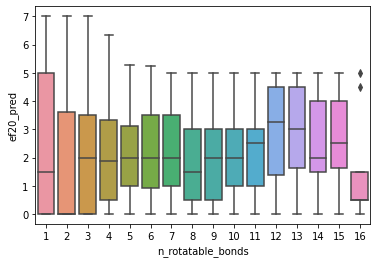

In [53]:
sns.boxplot(data=t_nomicro, x='n_rotatable_bonds', y='ef20_pred')

<AxesSubplot:xlabel='ef20_ccdc', ylabel='ef20_pred'>

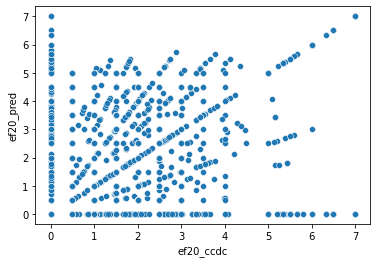

In [55]:
sns.scatterplot(data=t_nomicro, x='ef20_ccdc', y='ef20_pred')

<AxesSubplot:xlabel='n_generated', ylabel='ef20_ccdc'>

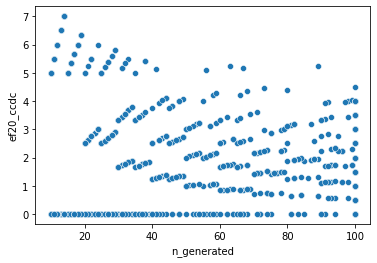

In [57]:
sns.scatterplot(data=t_nomicro, x='n_generated', y='ef20_ccdc')

<AxesSubplot:xlabel='n_generated', ylabel='ef20_pred'>

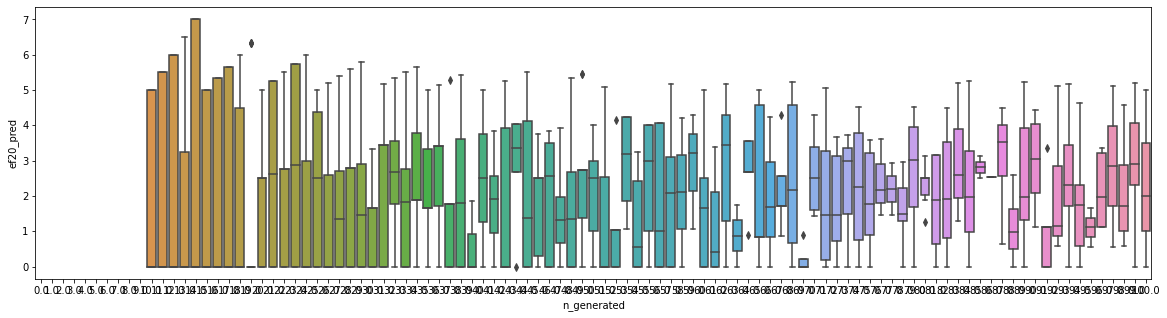

In [60]:
plt.figure(figsize=(20,5))
sns.boxplot(data=t_nomicro, x='n_generated', y='ef20_pred')

<AxesSubplot:xlabel='n_generated', ylabel='ef20_ccdc'>

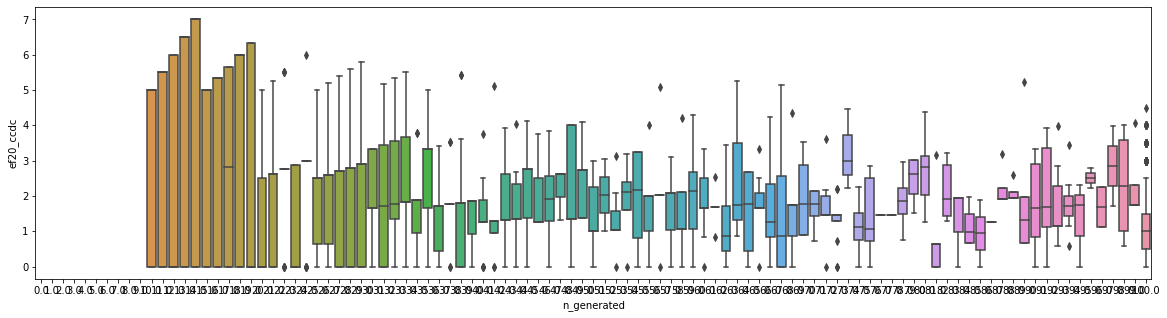

In [61]:
plt.figure(figsize=(20,5))
sns.boxplot(data=t_nomicro, x='n_generated', y='ef20_ccdc')

<AxesSubplot:xlabel='n_rotatable_bonds', ylabel='median_bioactive_rank'>

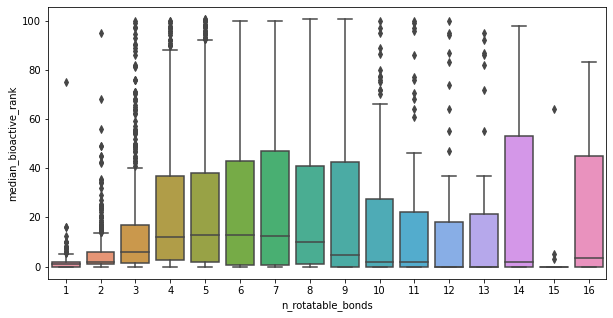

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=t_nomicro, x='n_rotatable_bonds', y='median_bioactive_rank')

<AxesSubplot:xlabel='n_rotatable_bonds', ylabel='bioactive_accuracy'>

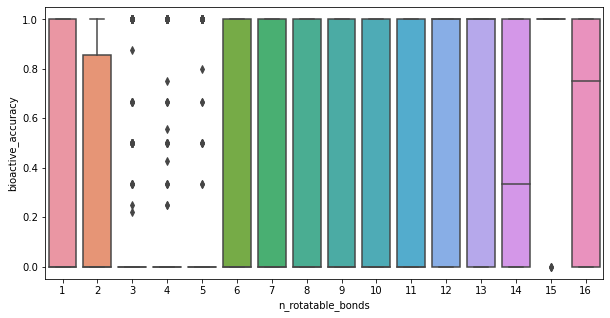

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=t_nomicro, x='n_rotatable_bonds', y='bioactive_accuracy')